In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, naive_bayes, datasets, decomposition,metrics, ensemble

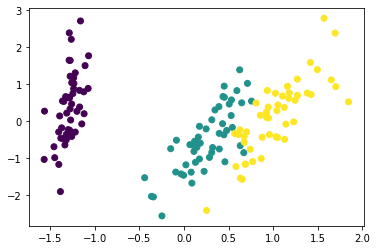

In [5]:
iris = datasets.load_iris()

pca = decomposition.PCA(n_components=2, whiten=True, svd_solver='randomized')
pca = pca.fit(iris.data)
X = pca.transform(iris.data)

#X = iris.data[:, :2]
y = iris.target

plt.scatter(X[:,0],X[:,1],c=y)


In [6]:
def make_meshgrid(x, y, h=.02):
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def clf_meshgrid(clf,x,y):
  cc = clf.predict(np.c_[x.ravel(),y.ravel()])
  return cc

xx, yy = make_meshgrid(X[:, 0], X[:, 1])

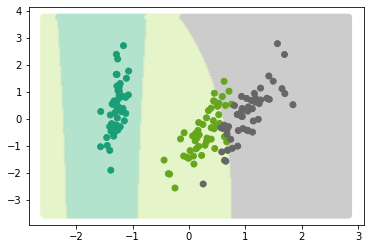

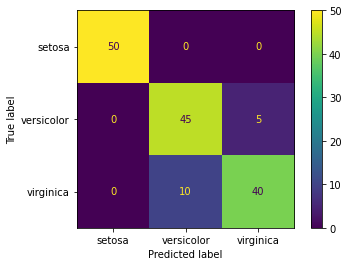

In [7]:
NBGauss = naive_bayes.GaussianNB()
NBGauss = NBGauss.fit(X,y)

c = clf_meshgrid(NBGauss,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(NBGauss, X, y,include_values=True,display_labels=iris.target_names)

plt.show()

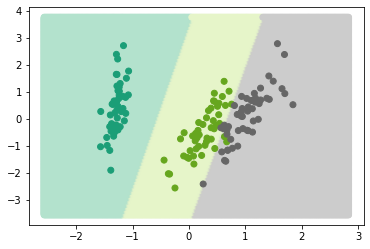

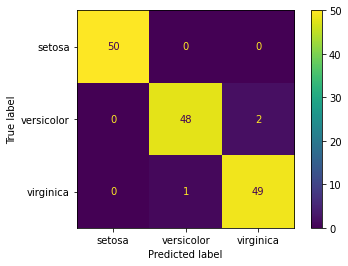

In [9]:
svmLinear = svm.SVC(kernel='linear', probability = True)
svmLinear = svmLinear.fit(X,y)

c = clf_meshgrid(svmLinear,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmLinear, X, y,include_values=True,display_labels=iris.target_names)

plt.show()

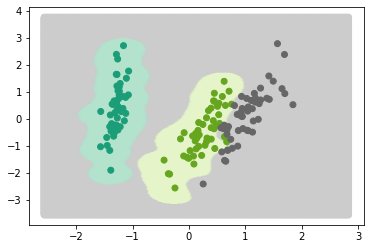

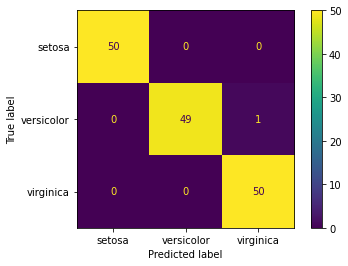

In [15]:
svmRBF = svm.SVC(kernel='rbf', gamma = 12, probability = True)
svmRBF = svmRBF.fit(X,y)

c = clf_meshgrid(svmRBF,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmRBF, X, y,include_values=True,display_labels=iris.target_names)

plt.show()

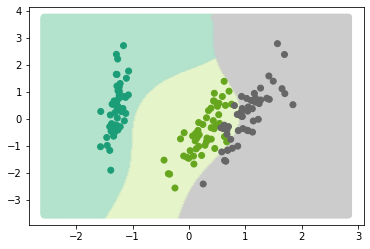

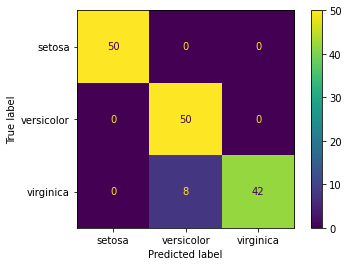

In [17]:
svmPoli = svm.SVC(kernel='poly', degree=3, probability = True)
svmPoli = svmPoli.fit(X,y)

c = clf_meshgrid(svmPoli,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmPoli, X, y,include_values=True,display_labels=iris.target_names)

plt.show()

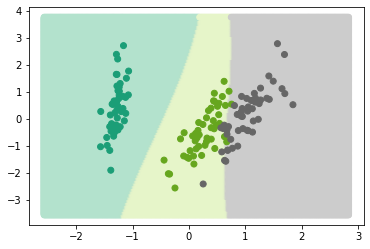

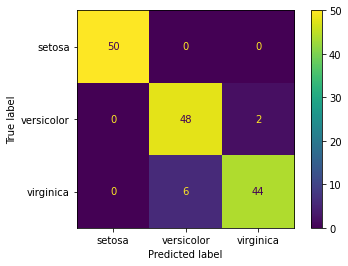

In [25]:
svmSig = svm.SVC(kernel='sigmoid', gamma =.1, probability = True)
svmSig = svmSig.fit(X,y)

c = clf_meshgrid(svmSig,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmSig, X, y,include_values=True,display_labels=iris.target_names)

plt.show()

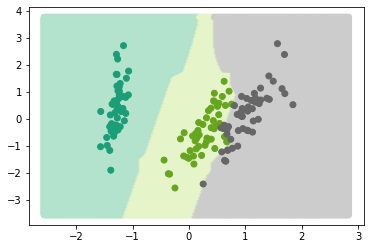

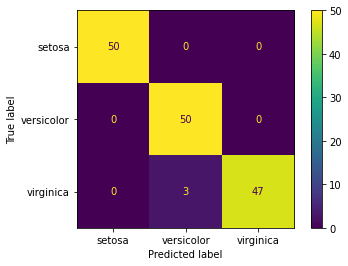

In [26]:




comite = ensemble.VotingClassifier(estimators=[('SVM Linear',svmLinear),
                                               ('SVM RBF',svmRBF),
                                               ('SVM Poli',svmPoli),
                                               ('SVM Sig',svmSig),
                                               ('NB Gauss',NBGauss )])

comite = comite.fit(X,y)

c = clf_meshgrid(comite,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(comite, X, y,include_values=True,display_labels=iris.target_names)
plt.show()
                                   
